In [49]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import os

In [50]:
os.chdir('/Volumes/Documents/Anaconda_Doc/SoftwareMethods/Tdata/Titanic')

In [51]:
data = pd.read_csv(r"./Data/train.csv")

In [52]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data processing

In [53]:
dataq = pd.read_csv(r"./Data/titanic.csv", index_col=0)

In [54]:
dataq.head()

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,,,
0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
# Filter characteristics
dataN = dataNew = data.drop(['Cabin', 'Name', 'Ticket'], inplace=False, axis=1)
dataN.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [57]:
# Dealing with missing values
dataN["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [58]:
# The mean fills the age gap
dataN["Age"] = dataN["Age"].fillna(dataN["Age"].mean())

In [59]:
dataN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [60]:
dataN = dataN.dropna()

In [61]:
dataN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [62]:
# convert gender and hatch into classification
dataN["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [63]:
dataN["Embarked"].unique().tolist()

['S', 'C', 'Q']

In [64]:
labels = dataN["Embarked"].unique().tolist()
dataN["Embarked"] = dataN["Embarked"].apply(lambda x: labels.index(x))

<ipython-input-64-c2d74948ed4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataN["Embarked"] = dataN["Embarked"].apply(lambda x: labels.index(x))


In [65]:
dataN

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [66]:
dataN["Sex"] = (dataN["Sex"] == "male").astype("int")

<ipython-input-66-53bfe04e3e46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataN["Sex"] = (dataN["Sex"] == "male").astype("int")


In [67]:
dataN.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [68]:
dataN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [69]:
# Separate feature label
x = dataN.iloc[:, dataN.columns != "Survived"]

In [70]:
data.columns != "Survived"

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [71]:
y = dataN.iloc[:, dataN.columns == "Survived"]

In [72]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3)

In [73]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
382,383,3,1,32.000000,0,0,7.9250,0
441,442,3,1,20.000000,0,0,9.5000,0
283,284,3,1,19.000000,0,0,8.0500,0
620,621,3,1,27.000000,1,0,14.4542,1
500,501,3,1,17.000000,0,0,8.6625,0
...,...,...,...,...,...,...,...,...
218,219,1,0,32.000000,0,0,76.2917,1
409,410,3,0,29.699118,3,1,25.4667,0
1,2,1,0,38.000000,1,0,71.2833,1
595,596,3,1,36.000000,1,1,24.1500,0


In [74]:
Xtrain.index

Int64Index([382, 441, 283, 620, 500,  59, 618, 192, 726, 593,
            ...
            210, 683, 515, 806, 577, 218, 409,   1, 595, 614],
           dtype='int64', length=622)

In [75]:
Xtrain.index = range(Xtrain.shape[0])

In [76]:
Xtrain.shape[0]

622

In [77]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [78]:
Ytrain

,Survived
0,0
1,0
2,1
3,0
4,0
...,...
617,1
618,0
619,1
620,0


### The initial attempt

In [79]:
clf = DecisionTreeClassifier(random_state = 25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7565543071161048

In [80]:
clf = DecisionTreeClassifier(random_state = 25)
score = cross_val_score(clf, x, y, cv=10).mean()
score

0.7469611848825333

0.8166624106230849


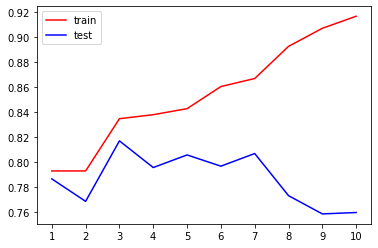

In [81]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state = 25, max_depth = i+1,criterion = "entropy")
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf, x, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

### Grid search

In [82]:
gini_threholds = np.linspace(0,0.5,50)

parameters  = {"criterion":("gini","entropy"), "splitter":("best","random"), "max_depth":[*range(1,10)]
              , "min_samples_leaf":[*range(1,50,5)]
              , "min_impurity_decrease":[*np.linspace(0,0.5,50)]}

clf = DecisionTreeClassifier(random_state = 25)
GS = GridSearchCV(clf, parameters, cv=10) 
GS = GS.fit(Xtrain, Ytrain)

In [83]:
GS.best_params_ 

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [84]:
GS.best_score_ 

0.8279825908858166

## Make predictions

### Data processing

In [85]:
dataTest = pd.read_csv(r"./Data/test.csv")

In [86]:
dataTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
dataT = dataTest.drop(['Cabin', 'Name', 'Ticket'], inplace=False, axis=1)
dataT.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [88]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [89]:
dataT.loc[:,"Age"] = dataT.loc[:,"Age"].fillna(dataT.loc[:,"Age"].mean())

In [90]:
dataT["Age"]

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [91]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [92]:
dataT = dataT.dropna() 

In [93]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [94]:
labels = dataT.loc[:,"Embarked"].unique().tolist()
dataT.loc[:,"Embarked"] = dataT.loc[:,"Embarked"].apply(lambda x: labels.index(x))

In [95]:
dataT

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,0
1,893,3,female,47.00000,1,0,7.0000,1
2,894,2,male,62.00000,0,0,9.6875,0
3,895,3,male,27.00000,0,0,8.6625,1
4,896,3,female,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,1
414,1306,1,female,39.00000,0,0,108.9000,2
415,1307,3,male,38.50000,0,0,7.2500,1
416,1308,3,male,30.27259,0,0,8.0500,1


In [96]:
dataT.loc[:,"Sex"] = (dataT.loc[:,"Sex"] == "male").astype("int")

In [97]:
dataT

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,0
1,893,3,0,47.00000,1,0,7.0000,1
2,894,2,1,62.00000,0,0,9.6875,0
3,895,3,1,27.00000,0,0,8.6625,1
4,896,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,1
414,1306,1,0,39.00000,0,0,108.9000,2
415,1307,3,1,38.50000,0,0,7.2500,1
416,1308,3,1,30.27259,0,0,8.0500,1


In [98]:
result = GS.predict(dataT)

In [99]:
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
result.shape

(417,)

In [101]:
dataOutput = dataT.copy()

In [102]:
dataOutput

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,0
1,893,3,0,47.00000,1,0,7.0000,1
2,894,2,1,62.00000,0,0,9.6875,0
3,895,3,1,27.00000,0,0,8.6625,1
4,896,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,1
414,1306,1,0,39.00000,0,0,108.9000,2
415,1307,3,1,38.50000,0,0,7.2500,1
416,1308,3,1,30.27259,0,0,8.0500,1


In [103]:
dataOutput.insert(1, 'Survived', result)

In [104]:
dataOutput

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.50000,0,0,7.8292,0
1,893,1,3,0,47.00000,1,0,7.0000,1
2,894,0,2,1,62.00000,0,0,9.6875,0
3,895,0,3,1,27.00000,0,0,8.6625,1
4,896,1,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30.27259,0,0,8.0500,1
414,1306,1,1,0,39.00000,0,0,108.9000,2
415,1307,0,3,1,38.50000,0,0,7.2500,1
416,1308,0,3,1,30.27259,0,0,8.0500,1


In [105]:
dataOutput = dataOutput.iloc[:, 0:2]

In [106]:
dataOutput

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
